İlk model (Varsayılan Parametreler)

In [88]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split,GridSearchCV
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


In [89]:
df = pd.read_csv("diabetes.csv").copy()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [90]:

X = df.drop(['Outcome'], axis = 1)
y = df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [91]:
gnb = GaussianNB()

In [92]:
gnb.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [93]:
y_pred = gnb.fit(X_train, y_train).predict(X_test)

0.7337662337662337
              precision    recall  f1-score   support

           0       0.75      0.87      0.81        98
           1       0.68      0.50      0.58        56

    accuracy                           0.73       154
   macro avg       0.72      0.68      0.69       154
weighted avg       0.73      0.73      0.72       154



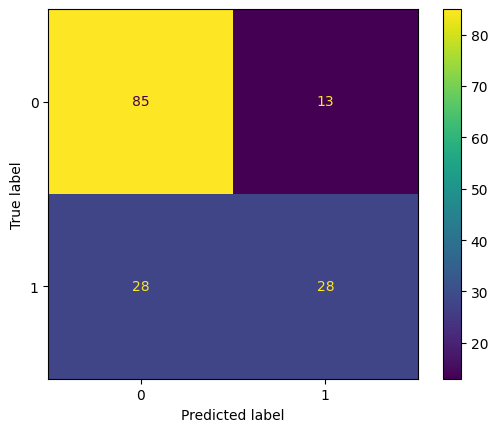

In [94]:
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
#plt.show()

İkinci Model (Grid Search)

In [95]:
np.logspace(0,-9, num=10)

array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07,
       1.e-08, 1.e-09])

In [96]:
from sklearn.model_selection import RepeatedStratifiedKFold

cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)

In [97]:
from sklearn.preprocessing import PowerTransformer
model = GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=model, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

Data_transformed = PowerTransformer().fit_transform(X_test)

gs_NB.fit(Data_transformed, y_test);

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


In [98]:
gs_NB.best_params_

{'var_smoothing': 0.01519911082952933}

In [99]:
gs_NB.best_score_

0.7448745519713262

In [100]:
results_NB = pd.DataFrame(gs_NB.cv_results_['params'])
results_NB['test_score'] = gs_NB.cv_results_['mean_test_score']

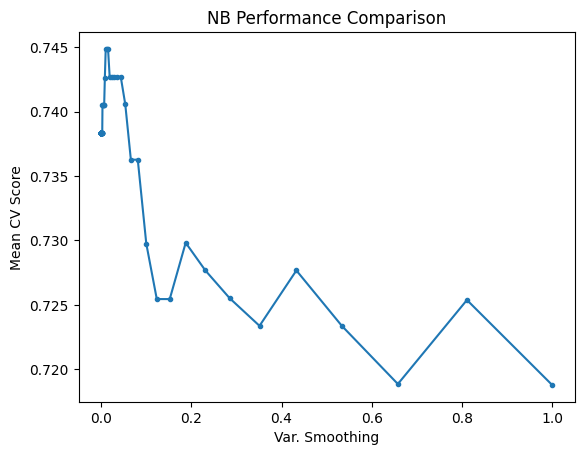

In [101]:
plt.plot(results_NB['var_smoothing'], results_NB['test_score'], marker = '.')    
plt.xlabel('Var. Smoothing')
plt.ylabel("Mean CV Score")
plt.title("NB Performance Comparison")
plt.show()

In [102]:
predict_test = gs_NB.predict(Data_transformed)

accuracy_test = accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

accuracy_score on test dataset :  0.7727272727272727


Son Model (Normalizasyon)

In [103]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_scaled, y, test_size=0.2)

In [104]:
y_pred = gnb.fit(X_train1,y_train1).predict(X_test1)

Accuracy:  0.7597402597402597
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       102
           1       0.65      0.62      0.63        52

    accuracy                           0.76       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.76      0.76      0.76       154



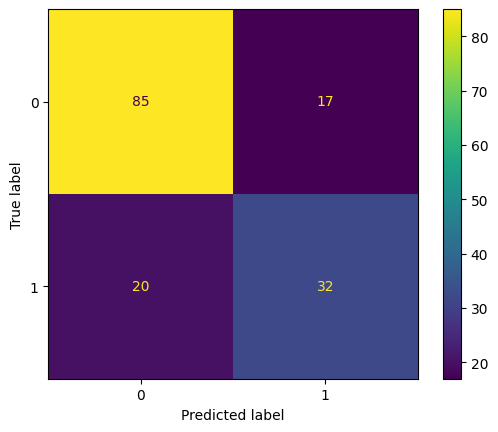

In [105]:
print("Accuracy: ", accuracy_score(y_test1, y_pred))
print(classification_report(y_test1, y_pred))
confusion_matrix = metrics.confusion_matrix(y_test1, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()